<div style="color:#3c4d5a; border-top: 7px solid #42A5F5; border-bottom: 7px solid #42A5F5; padding: 5px; text-align: center; text-transform: uppercase"><h1>Deep Learning - Redes Neuronales Convolucionales (CNN) - Clasificación de Imágenes con CIFAR10</h1> </div>

Desarrollado por: Ing. Remigio Hurtado Ortiz, PhD. Universidad Politécnica Salesiana. Grupo de Inteligencia Artificial y Tecnologías de Asistencia. Correo de contacto: rhurtadoo@ups.edu.ec 

En esta práctica aprenderás a desarrollar y evaluar una CNN en un dataset de imágenes que contiene 10 categorías (CIFAR10). 

Esta práctica está estructurada de la siguiente manera:

- [Fundamentos de CNN](#Fundamentos)
- [Fundamentos de Keras](#FundamentosKeras)
- [Exploración del dataset](#Exploracion)
- [Preparación del dataset](#Preparacion)
- [Desarrollo de CNN](#DesarrolloCNN)
- [Predicción de nuevas imágenes](#PrediccionNuevasImagenes)
- [Desarrollo de Red Neuronal Estándar (Densa)](#DesarrolloRedDensa)
- [Comparación de CNN vs Red Neuronal Densa](#Comparacion)
- [Conclusiones](#Conclusiones)
- [Referencias](#Referencias)

<div id="Fundamentos" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Fundamentos de CNN</h2> </div>

Una de las aplicaciones más importantes de las redes neuronales es la clasificación de imágenes. En esta área, las redes neuronales convolucionales (CNN por sus siglas en inglés) funcionan mejor que cualquier otro algoritmo. Las redes neuronales convolucionales son una ampliación (no una modificación) de las redes neuronales estándares o densas (SNN).

Las CNN permiten ahorrar recursos y atacar problemas más grandes, utilizando la técnica de **compartir pesos**.

Las redes neuronales convolucionales permiten desarrollar redes neuronales, pero con muchos menos parámetros y menos cálculos. La idea es compartir pesos entre neuronas. Pero **para ello los datos deben tener redundancias de bajo nivel en ubicaciones diferentes**. El típico ejemplo con las imágenes es que una imagen está compuesta por la concatenación de pequeños parches que representan información común como esquinas, ejes verticales y horizontales, colores comunes, etc.

La ampliación consiste en añadir más capas al principio de la red, que se encargarán de manipular las entradas (los píxeles de las imágenes). En dicha ampliación, existen dos tipos de capas: 

**1. capas de convolución (convolutional layers)**, y

**2. capas de pooling (pooling layers)**

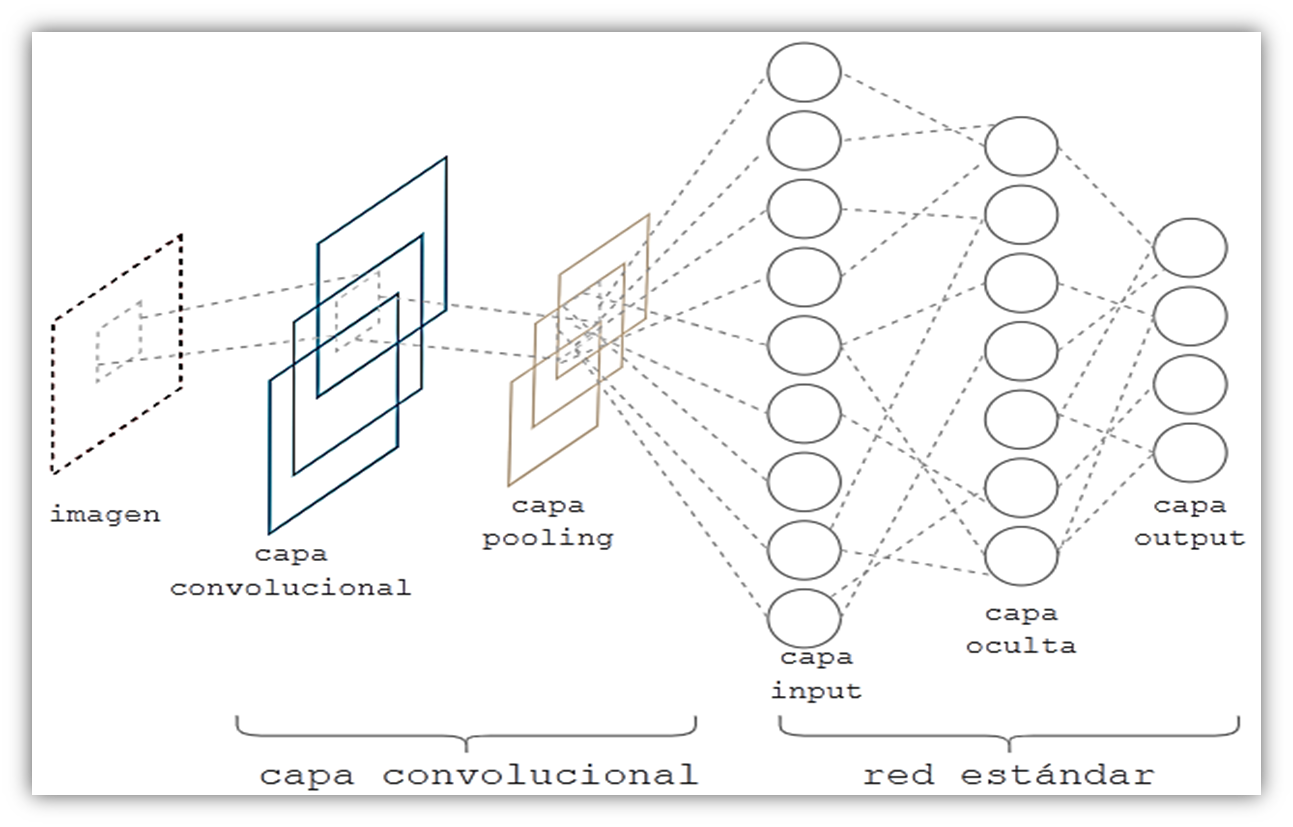

**Capa de convolución:** extrae los rasgos característicos de una imagen. Dichos rasgos se extraen aplicando filtros (kernels) para cada capa convolucional. 

Los **filtros**, también conocidos como "kernels", son matrices tridimensionales pequeñas que se utilizan para realizar operaciones de convolución en una imagen de entrada o en las características extraídas de capas anteriores de la CNN. Estos filtros son una parte fundamental de la arquitectura de una CNN y desempeñan un papel crucial en la detección de características y patrones en las imágenes.

Cada filtro se desliza (mediante una operación de convolución) a través de la imagen o las características, y su propósito es detectar características específicas o patrones en los datos, como bordes, texturas, formas, detalles y otros elementos relevantes. Durante la convolución, el filtro escanea una región local de la imagen, y la salida se calcula multiplicando los valores del filtro por los valores de los píxeles en esa región y sumando los resultados. Este proceso se repite a lo largo de la imagen para generar un nuevo conjunto de características llamado "mapa de características" o "feature map".

Los filtros en una CNN son entrenados durante el proceso de aprendizaje. Durante el entrenamiento, la red ajusta los valores de los filtros para que puedan aprender a reconocer características y patrones específicos en los datos, lo que permite a la CNN realizar tareas de clasificación, detección de objetos, segmentación y otras tareas de visión por computadora de manera efectiva.

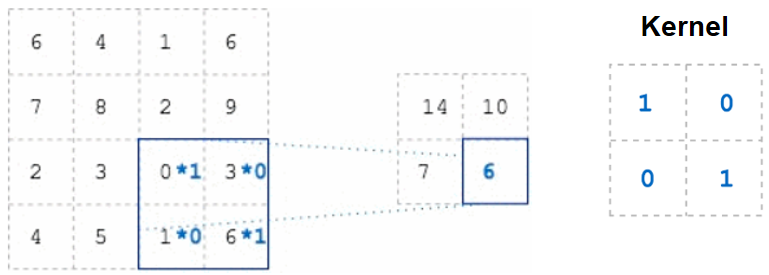

**Capa de pooling:** extrae los píxeles más representativos de una franja delimitada de una imagen. En la imagen representa el funcionamiento de un max pooling.

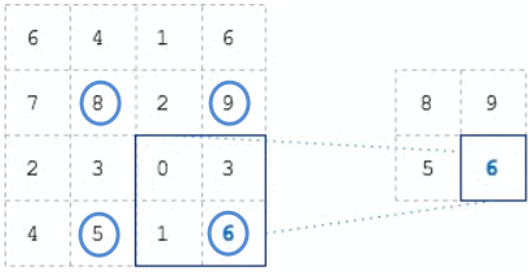

<div style="color:#106ba3"><h3>Características básicas de las imágenes</h3> </div>

In [36]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import tensorflow as tf

print("Versión de TensorFlow:", tf.__version__)


Versión de TensorFlow: 2.19.0


In [38]:
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import tarfile
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import matplotlib.pyplot as plt
print('importadas')

importadas


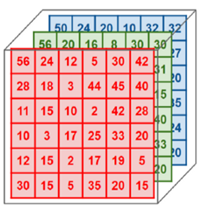

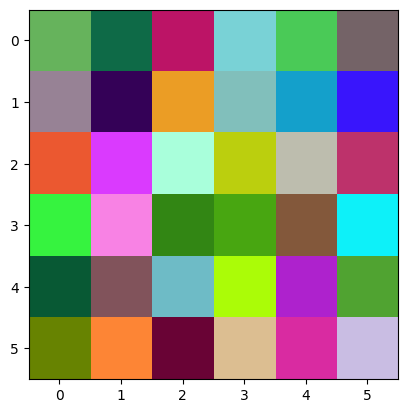

In [40]:
#RGB: rojo, verde, azul

#Librería para visualizar la imagen
import numpy as np
import matplotlib.pyplot as plt

#Fijamos la semilla del generador de valores aleatorios
np.random.seed(42)

#256 indica que se crean valores entre 0 y 255
A = np.random.randint(256, size=(6,6,3))

#Visualizamos el tensor A
plt.imshow(A)

#print(A)
#print(type(A))

<div id="FundamentosKeras" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Fundamentos de Keras</h2> </div>

Keras es una biblioteca de código abierto para el aprendizaje profundo (deep learning) en Python que se ejecuta sobre otros frameworks de deep learning como TensorFlow, Theano y Microsoft Cognitive Toolkit. Fue diseñada con el objetivo de ser una interfaz de alto nivel y fácil de usar para la creación y entrenamiento de modelos de redes neuronales. Aquí tienes algunos de los fundamentos clave de Keras:

- **Facilidad de uso:** Keras se destaca por su facilidad de uso y una API diseñada de manera intuitiva. Permite a los desarrolladores crear y entrenar modelos de deep learning con un código más simple y legible en comparación con otras bibliotecas.

- **Modularidad:** Keras se basa en el principio de la modularidad. Los modelos se crean mediante la combinación de capas (layers) de manera sencilla y flexible. Puedes apilar capas secuencialmente o crear modelos más complejos con múltiples ramas y conexiones.

- **Compatibilidad con múltiples backends:** Keras es compatible con varios backends, incluyendo TensorFlow, Theano y CNTK. Esto significa que puedes cambiar el backend subyacente sin tener que reescribir todo tu código.

- **Amplia gama de capas y funciones de activación:** Keras ofrece una variedad de capas, como capas densas (fully connected), convolucionales, recurrentes, de normalización, etc. Además, proporciona numerosas funciones de activación y funciones de pérdida personalizables.

- **Entrenamiento y evaluación sencillos:** Keras simplifica el proceso de entrenamiento de modelos con funciones como compile(), fit(), y evaluate(). También ofrece callbacks que permiten monitorear el progreso del entrenamiento y realizar acciones personalizadas durante el mismo.

- **Preprocesamiento de datos integrado:** Keras incluye herramientas para el preprocesamiento de datos, como la normalización y la generación de lotes de datos.

- **Compatibilidad con GPU y TPU:** Keras es compatible con hardware acelerado, como GPUs y TPUs, lo que permite un entrenamiento más rápido de modelos de deep learning.

- **Redes neuronales convolucionales y recurrentes:** Keras es ampliamente utilizado para crear modelos de redes neuronales convolucionales (CNN) y redes neuronales recurrentes (RNN) para tareas de visión por computadora, procesamiento de lenguaje natural y más.

- **Modelos preentrenados:** Keras proporciona acceso a modelos preentrenados en conjuntos de datos masivos, como ImageNet, que se pueden utilizar como base para tareas específicas de clasificación o detección.

- **Comunidad activa y documentación abundante:** Keras tiene una comunidad activa de usuarios y una documentación completa que incluye tutoriales, ejemplos y recursos educativos.

Se puede obtener información actualizada sobre Keras visitando el sitio web oficial de Keras en https://keras.io y la documentación asociada. También se puede encontrar recursos educativos, tutoriales y libros sobre Keras que detallan sus características y usos en profundidad.

<div id="Exploracion" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Exploración del dataset CIFAR 10</h2> </div>

Dataset: CIFAR10 que contiene 60000 imágenes (samples) de **10 categorías**: 

airplane : 0
automobile : 1
bird : 2
cat : 3
deer : 4
dog : 5
frog : 6
horse : 7
ship : 8
truck : 9

Para cargar el Dataset directamente de keras el proceso sería:

**from tensorflow.keras.datasets import cifar10**

**(X_train, y_train), (X_test, y_test) = cifar10.load_data()**

Por fines de aprendizaje, nosotros cargaremos el dataset de un directorio:

Url dataset: https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

Para descomprimir el dataset del archivo tar.gz sería:

!tar xzvf cifar-10-python.tar.gz

El dataset se divide en 50000 imágenes para train y 10000 para test. 

In [41]:
# Se descomprime el archivo
import tarfile

with tarfile.open("cifar-10-python.tar.gz", "r:gz") as tar:
    tar.extractall()


C:\Users\mlata\AppData\Local\Temp\ipykernel_4512\338252783.py:5: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall()



Estadísticas del batch 1:
Samples (cantidad de imágenes): 10000
Cantidad de Etiquetas: {np.int64(0): np.int64(1005), np.int64(1): np.int64(974), np.int64(2): np.int64(1032), np.int64(3): np.int64(1016), np.int64(4): np.int64(999), np.int64(5): np.int64(937), np.int64(6): np.int64(1030), np.int64(7): np.int64(1001), np.int64(8): np.int64(1025), np.int64(9): np.int64(981)}
Primeras 20 Etiquetas: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Imagen 9999:
Imagen - Valor Min: 4 Valor Max: 252
Imagen - Shape: (32, 32, 3)
Etiqueta - Etiqueta Id: 5 Nombre: dog


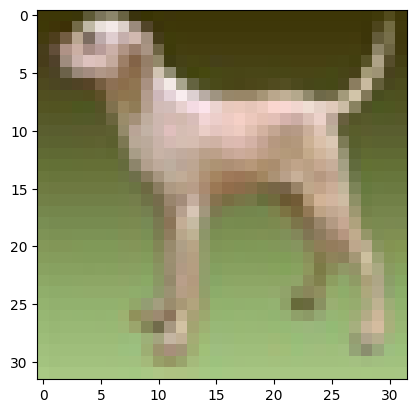

In [42]:
import pickle
import numpy as np

# Función para indicar el nombre de las categorías
def _load_label_names():
    """
    Load the label names from file
    """
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Función para cargar cada batch de imágenes
def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):
    """
    Load a batch of the dataset
    """
    with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id), mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')
    
    #cada batch 10000 imágenes, cada imagen de 32x32x3
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1) 
    labels = batch['labels']

    return features, labels

# Función para visualizar una imagen de un batch específico del dataset y presentar sus caracerísticas más relevantes
def display_stats(cifar10_dataset_folder_path, batch_id, sample_id):
    """
    Display Stats of the the dataset
    """
    batch_ids = list(range(1, 6))

    if batch_id not in batch_ids:
        print('Batch Id out of Range. Possible Batch Ids: {}'.format(batch_ids))
        return None

    features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_id)

    if not (0 <= sample_id < len(features)):
        print('{} samples in batch {}.  {} is out of range.'.format(len(features), batch_id, sample_id))
        return None

    print('\nEstadísticas del batch {}:'.format(batch_id))
    print('Samples (cantidad de imágenes): {}'.format(len(features)))
    print('Cantidad de Etiquetas: {}'.format(dict(zip(*np.unique(labels, return_counts=True)))))
    print('Primeras 20 Etiquetas: {}'.format(labels[:20]))

    sample_image = features[sample_id]
    sample_label = labels[sample_id]
    label_names = _load_label_names()

    print('\nImagen {}:'.format(sample_id))
    print('Imagen - Valor Min: {} Valor Max: {}'.format(sample_image.min(), sample_image.max()))
    print('Imagen - Shape: {}'.format(sample_image.shape))
    print('Etiqueta - Etiqueta Id: {} Nombre: {}'.format(sample_label, label_names[sample_label]))
    #plt.axis('off')
    plt.imshow(sample_image)

batch_id = 1
sample_id = 9999
cifar10_dataset_folder_path='cifar-10-batches-py'
display_stats(cifar10_dataset_folder_path, batch_id, sample_id)


Estadísticas del batch 5:
Samples (cantidad de imágenes): 10000
Cantidad de Etiquetas: {np.int64(0): np.int64(1014), np.int64(1): np.int64(1014), np.int64(2): np.int64(952), np.int64(3): np.int64(1016), np.int64(4): np.int64(997), np.int64(5): np.int64(1025), np.int64(6): np.int64(980), np.int64(7): np.int64(977), np.int64(8): np.int64(1003), np.int64(9): np.int64(1022)}
Primeras 20 Etiquetas: [1, 8, 5, 1, 5, 7, 4, 3, 8, 2, 7, 2, 0, 1, 5, 9, 6, 2, 0, 8]

Imagen 9999:
Imagen - Valor Min: 4 Valor Max: 255
Imagen - Shape: (32, 32, 3)
Etiqueta - Etiqueta Id: 1 Nombre: automobile


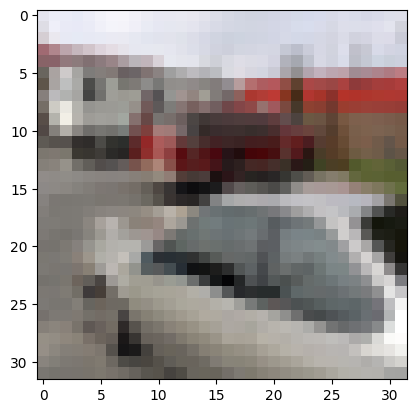

In [43]:
batch_id = 5
sample_id = 9999
cifar10_dataset_folder_path='cifar-10-batches-py'
display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

<div id="Preparacion" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Preparación del dataset</h2> </div>

El dataset se divide en 50000 imágenes para train y 10000 para test. 
Cada imagen es de 32x32pixeles y tiene 3 canales. 10000 imagenes por cada batch para evitar un desbordamiento de memoria.
Cada fila (imagen) de CIFAR10 es de 3072 columnas. 32pixeles x 32pixeles x 3canales = 3072 características

Para las CNN esta estructura no es apropiada. Para ML clásico sí lo es.
Para CNN la entrada del Tensor debería ser: (ancho x alto x num_canales) o (num_canales x ancho x alto)

Para este ejemplo: (ancho x alto x num_canales) por la función conv2d.

**Proceso:** 

1. Dividir 3072 en 3 partes de 1024 cada una. 

2. Dividir 1024 para 32. 32x32=1024. 32 de ancho x 32 de alto

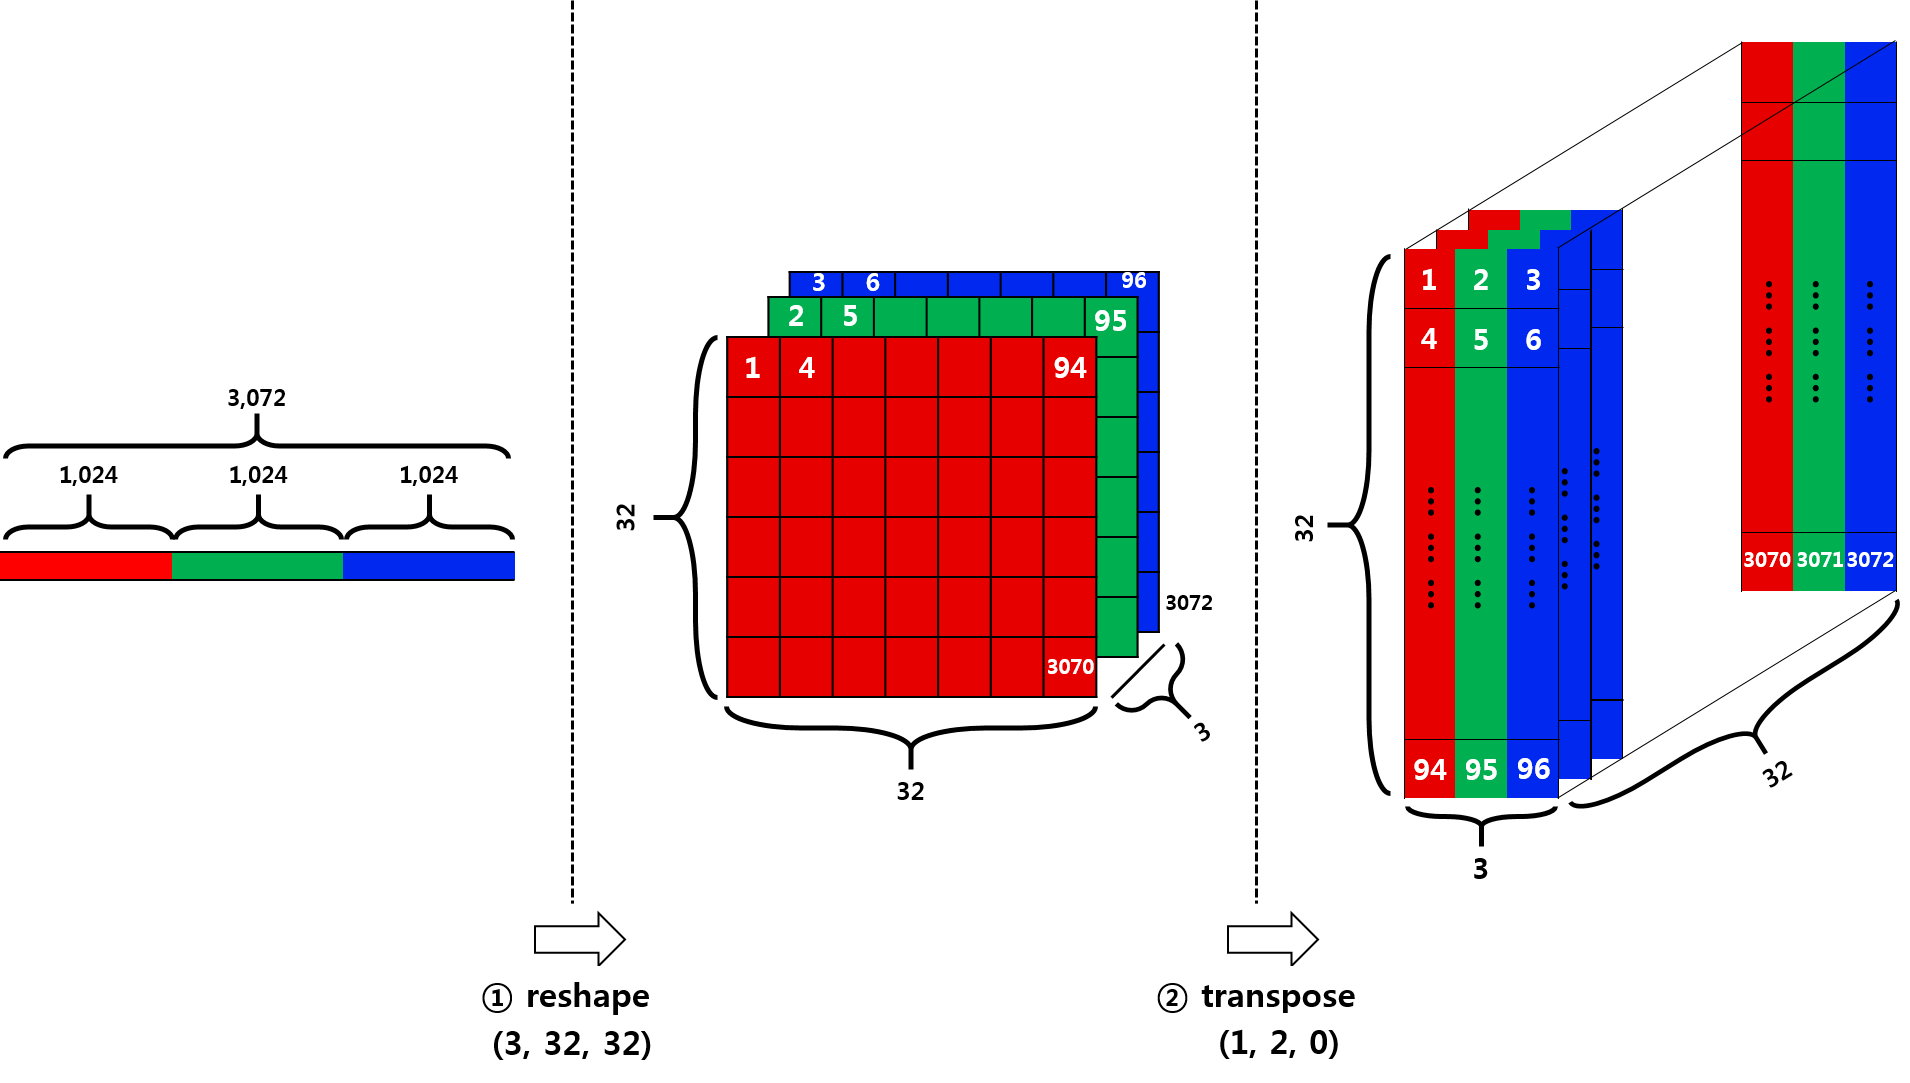

<div style="color:#106ba3"><h3>Formación de conjuntos de Train y Test</h3> </div>

In [44]:
# Función para transformar cada batch. Además, se separa X y Y (es la clase).
def load_data():
    """Loads CIFAR10 dataset.
    Returns:
      Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
    """
    import os
    import sys
    from six.moves import cPickle
    import numpy as np
    
    def load_batch(fpath):
        with open(fpath, 'rb') as f:
            d = cPickle.load(f, encoding='bytes')  
        data = d[b'data']
        #Estructura original: 10000x3072. Se transforma con reshape a una estructura de: 10000x3x32x32. 3x32x32=3072
        print(data.shape)
        labels = d[b'labels']
        data = data.reshape(data.shape[0], 3, 32, 32)
        print(data.shape)
        return data, labels
    
    path = 'cifar-10-batches-py'
    num_train_samples = 50000

    print('Creación de estructuras vacías')
    x_train = np.empty((num_train_samples, 3, 32, 32), dtype='uint8')
    y_train = np.empty((num_train_samples,), dtype='uint8')
    print(x_train.shape)
    print(y_train.shape)
    
    print("""\nSe carga cada batch de train: antes de esto, cada batch se hace reshape de 10000 x 3072 a: 10000 x 3 x 32 x 32.\nRecordar que 3x32x32=3072""")
    for i in range(1, 6):
        fpath = os.path.join(path, 'data_batch_' + str(i))
        (x_train[(i - 1) * 10000:i * 10000, :, :, :],
         y_train[(i - 1) * 10000:i * 10000]) = load_batch(fpath)
        
    print('\nSe carga el batch de test: antes de esto, se hace reshape de 10000 x 3072 a: 10000 x 3 x 32 x 32')
    x_test, y_test = load_batch(os.path.join(path, 'test_batch'))
    
    print('\nSe hace reshape de la salida (las etiquetas)')
    y_train = np.reshape(y_train, (len(y_train), 1))
    y_test = np.reshape(y_test, (len(y_test), 1))
    print('train:',y_train.shape)
    print('test:',y_test.shape)

    print('\nEstructuras de X')
    print('train:',x_train.shape)
    print('test:',x_test.shape)
    print('\nSe hace transpose de X (las imagenes)')
    x_train = x_train.transpose(0, 2, 3, 1) #enviamos al final el número de canales
    x_test = x_test.transpose(0, 2, 3, 1)
    print('train:',x_train.shape)
    print('test:',x_test.shape)

    return (x_train, y_train), (x_test, y_test)

In [45]:
#Para cargar el Dataset desde el arhivo local
(X_train, y_train), (X_test, y_test) = load_data()
print('\n********** Dataset cargado con X y Y')

Creación de estructuras vacías
(50000, 3, 32, 32)
(50000,)

Se carga cada batch de train: antes de esto, cada batch se hace reshape de 10000 x 3072 a: 10000 x 3 x 32 x 32.
Recordar que 3x32x32=3072
(10000, 3072)
(10000, 3, 32, 32)
(10000, 3072)
(10000, 3, 32, 32)
(10000, 3072)
(10000, 3, 32, 32)
(10000, 3072)
(10000, 3, 32, 32)
(10000, 3072)
(10000, 3, 32, 32)

Se carga el batch de test: antes de esto, se hace reshape de 10000 x 3072 a: 10000 x 3 x 32 x 32
(10000, 3072)
(10000, 3, 32, 32)

Se hace reshape de la salida (las etiquetas)
train: (50000, 1)
test: (10000, 1)

Estructuras de X
train: (50000, 3, 32, 32)
test: (10000, 3, 32, 32)

Se hace transpose de X (las imagenes)
train: (50000, 32, 32, 3)
test: (10000, 32, 32, 3)

********** Dataset cargado con X y Y


<div style="color:#106ba3"><h3>Análisis de frecuencia de categorías</h3> </div>

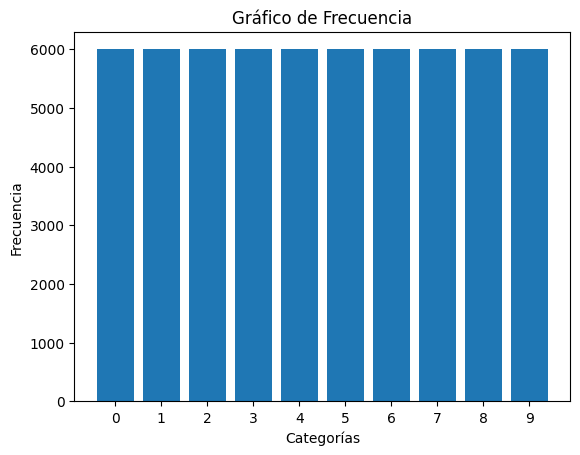

In [46]:
import matplotlib.pyplot as plt
from collections import Counter
Y=y_train.flatten().tolist()
Y.extend(y_test.flatten().tolist())

# Utiliza Counter para contar las frecuencias de los elementos en la lista
frecuencias = Counter(Y)

# Separa las claves (elementos) y los valores (frecuencias) en listas separadas
elementos = list(frecuencias.keys())
frecuencias = list(frecuencias.values())

# Crea un gráfico de barras
plt.bar(elementos, frecuencias)

# Etiquetas y título
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Frecuencia')

# Establece las etiquetas del eje X
plt.xticks(elementos)

# Muestra el gráfico
plt.show()

<div style="color:#106ba3"><h3>Normalización</h3> </div>

In [47]:
# Normalizamos tanto X_train como X_test, en este caso de forma sencilla porque los valores de los pixeles van de 0 a 255. 
x_train = X_train/255
x_test = X_test/255
print("********* Normalización lista")

#Ejemplo para verificar
print('x:',X_test[9999,1,1,1])
print("""x':""",x_test[9999,1,1,1])

********* Normalización lista
x: 89
x': 0.34901960784313724


<div id="DesarrolloCNN" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Desarrollo de CNN</h2> </div>

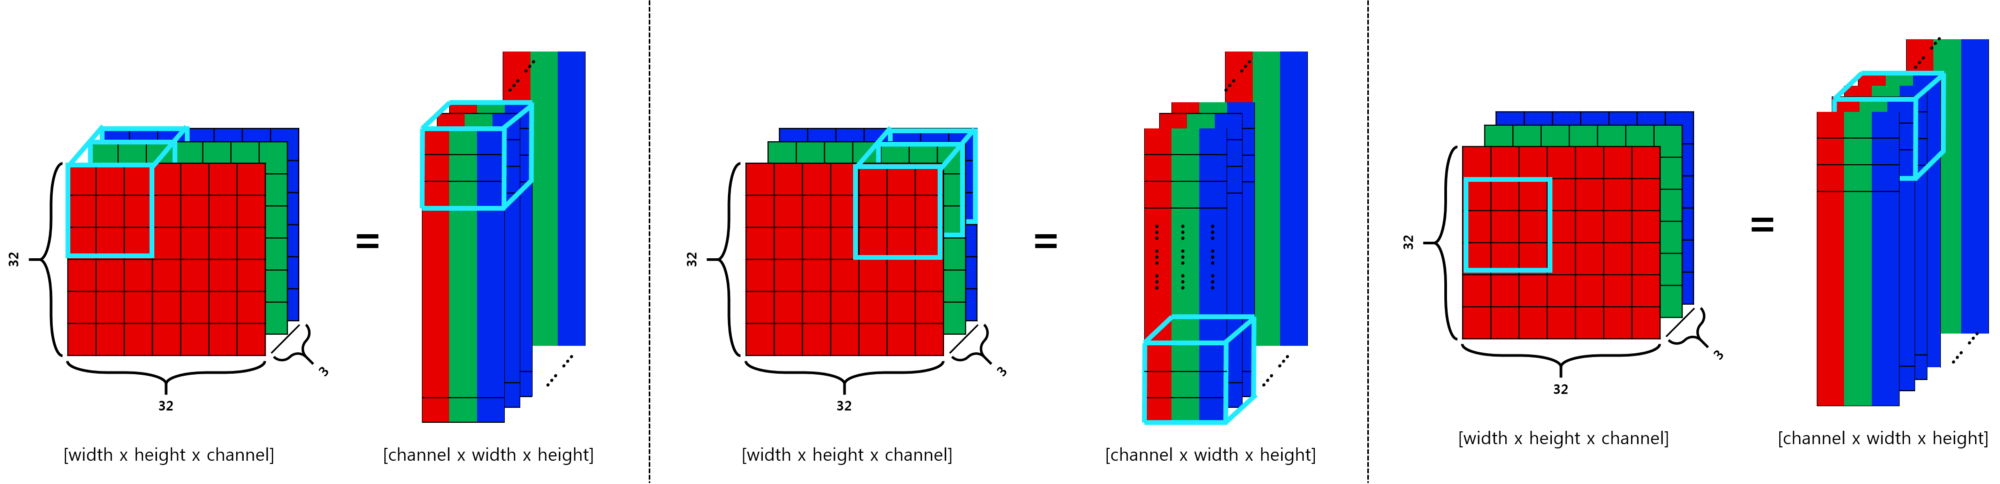

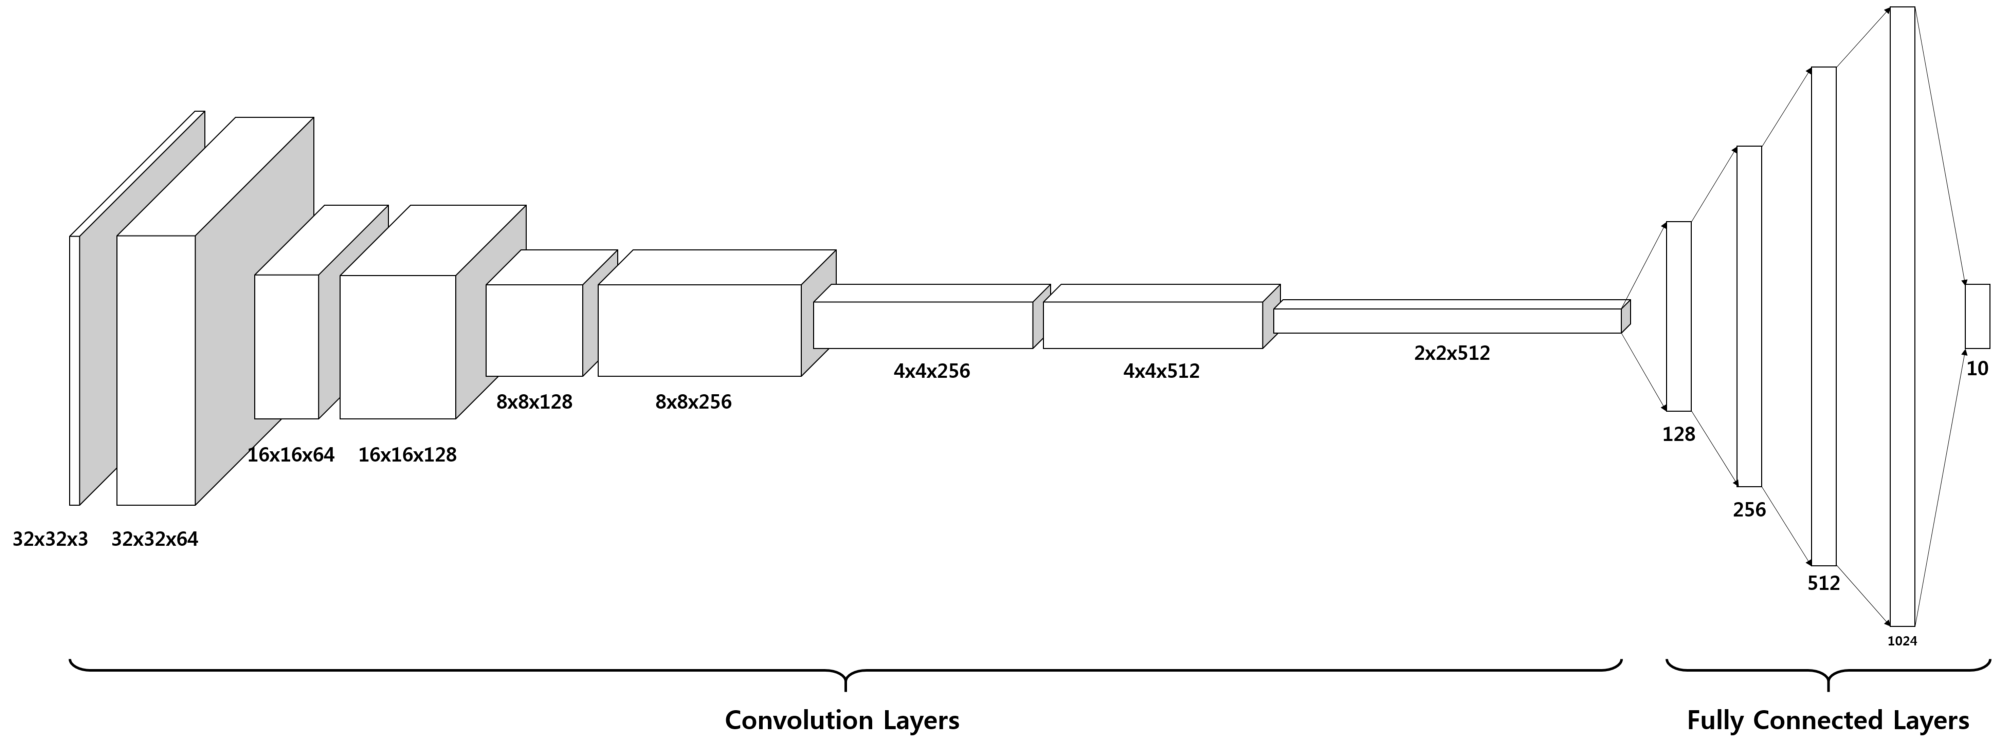

In [48]:
# Para verificar se presenta la estructura de una imagen
x_train.shape[1:]

(32, 32, 3)

In [49]:
# Se desarrolla el modelo
model = Sequential()
#Añadimos una capa convolucional con 32 filtros de 3píxeles de ancho x 3píxeles de altura. Vamos a aplicarlo a cada imagen. 
#Cada filtro sería de: 3x3x3. 
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape = x_train.shape[1:]))
#añadimos otra capa convolucional con 32 filtros de 3x3
model.add(Conv2D(32, (3, 3), activation='relu'))
#añadimos una capa de pooling de 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))
#este dropout desactiva el 25% de las conexiones entre las neuronas, lo cual mejora los resultados
model.add(Dropout(0.25))

#repetimos todas las capas otra vez
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#repetimos todas las capas otra vez
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#añadimos una capa para aplanar la estructura y convertir en una matriz para el ingreso a la red densa 
model.add(Flatten())
#añadimos una capa con 512 neuronas
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
#en la última capa tiene que hacer tantas neuronas como clases haya, en este caso 10
model.add(Dense(10, activation='softmax'))

#compilamos el modelo
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

c:\Users\mlata\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<div style="color:#106ba3"><h3>Entrenamiento de la red</h3> </div>

In [50]:
#Fase de training

#procesamos las imágenes en lotes de 256 (para no cargar las 50000 imágenes de golpe) y 
#hacemos que la red recorra la fase de entrenamiento (epochs) 100 veces.
size_batch = 256
epocas = 6
history = model.fit(x_train, y_train, batch_size= size_batch, epochs=epocas, verbose=1)
#en 50 epochs aproximadamente: loss: 0.4032 - accuracy: 0.8588

Epoch 1/6
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - accuracy: 0.2016 - loss: 2.0920
Epoch 2/6
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.4290 - loss: 1.5403
Epoch 3/6
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.5109 - loss: 1.3404
Epoch 4/6
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.5710 - loss: 1.1856
Epoch 5/6
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.6062 - loss: 1.1004
Epoch 6/6
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.6333 - loss: 1.0322


<div style="color:#106ba3"><h3>Evaluación en Test</h3> </div>

In [51]:
#Fase de Testing
resultadoscnn = model.evaluate(x_test, y_test)

error_rate_cnn=resultadoscnn[0]
print('loss:',error_rate_cnn)
acc_cnn=resultadoscnn[1]
print('acc:',acc_cnn)
#con más epochs y 10000 imagenes en test. Aprox: loss: 0.5350 - accuracy: 0.8277

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6778 - loss: 0.9086
loss: 0.9101487994194031
acc: 0.6736999750137329


In [52]:
%pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
#Predicciones con el conjunto de Test
import pandas as pd
y_pred = model.predict(x_test)
#argmax identifica el valor máximo para determinar la categoría
y_pred = np.argmax(y_pred, axis=-1) 
y_pred = y_pred.flatten()
y_test2 = y_test.flatten()
print(y_pred)
print(y_test2)
dataframeFinal=pd.DataFrame({'real':y_test2, 'predicción': y_pred})
np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})
dataframeFinal.head(10)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[3 8 8 ... 5 1 7]
[3 8 8 ... 5 1 7]


,real,predicción
0,3,3
1,8,8
2,8,8
3,0,8
4,6,6
5,6,6
6,1,1
7,6,6
8,3,3
9,1,1


In [54]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Mean Absolute Error (MAE): 1.1224
Mean Squared Error (MSE): 5.6866
Root Mean Squared Error (RMSE): 2.3847
Accuracy: 0.6737
Precision: 0.6803
Recall: 0.6737
F1: 0.6714
Matriz de confusión:
[[620  39  45  32   6   8  12  17 177  44]
 [ 10 874   0   5   1   1  13   2  37  57]
 [ 78   9 460 119  89  73  92  34  31  15]
 [ 18  11  48 572  37 164  81  31  23  15]
 [ 27   8  72 112 520  44  95 108  12   2]
 [  9   3  39 309  26 522  32  46   8   6]
 [  4   4  30 104  29   6 806   8   6   3]
 [ 13   3  17  69  53  70  16 739   2  18]
 [ 45  32   6  22   4   3   9   7 856  16]
 [ 14 118   7  14   3   4  18  18  36 768]]


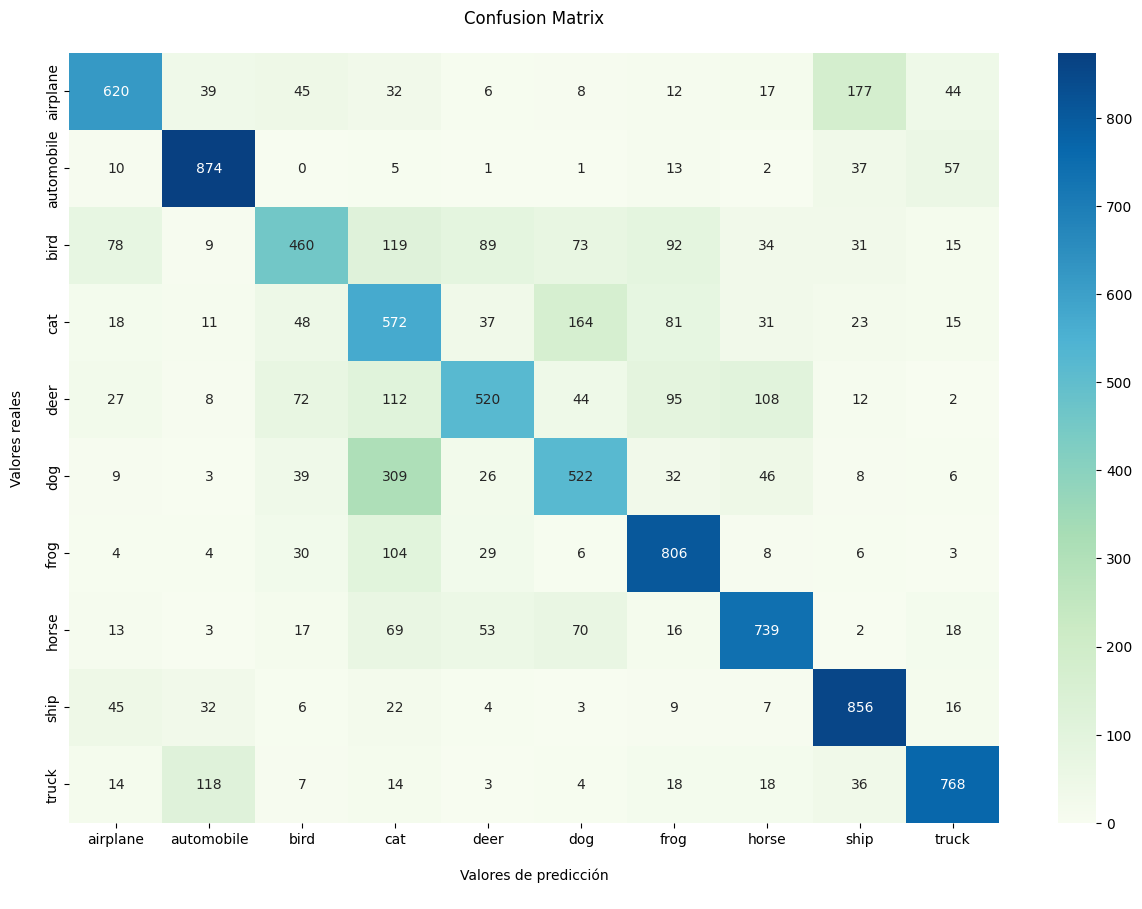

In [56]:
# Se evalúa el modelo con otras medidas de calidad y se presenta la matriz de confusión
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics  
import seaborn as sns
import matplotlib.pyplot as plt

# Cálculo de métricas
MAE = metrics.mean_absolute_error(y_test2, y_pred)
MSE = metrics.mean_squared_error(y_test2, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test2, y_pred))

# Mostrar métricas
print('Mean Absolute Error (MAE):', round(MAE, 4))  
print('Mean Squared Error (MSE):', round(MSE, 4))  
print('Root Mean Squared Error (RMSE):', round(RMSE, 4)) 

accuracy = accuracy_score(y_test2, y_pred)
print('Accuracy:', round(accuracy, 4))

precision = precision_score(y_test2, y_pred, average='weighted')
print('Precision:', round(precision, 4))

recall = recall_score(y_test2, y_pred, average='weighted')
print('Recall:', round(recall, 4))

f1 = f1_score(y_test2, y_pred, average='weighted')
print('F1:', round(f1, 4))

# Matriz de confusión
print('Matriz de confusión:')
conf_matrix = confusion_matrix(y_test2, y_pred)
print(conf_matrix)

# Gráfico de la matriz de confusión
plt.figure(figsize=(15, 10))
fx = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="GnBu")
fx.set_title('Confusion Matrix\n')
fx.set_xlabel('\nValores de predicción\n')
fx.set_ylabel('Valores reales\n')
fx.xaxis.set_ticklabels(_load_label_names())
fx.yaxis.set_ticklabels(_load_label_names())
plt.show()


In [57]:
# Se presenta la calidad de clasificación por categoría y a nivel general
from sklearn.metrics import classification_report
print(classification_report(y_test2,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.62      0.67      1000
           1       0.79      0.87      0.83      1000
           2       0.64      0.46      0.53      1000
           3       0.42      0.57      0.49      1000
           4       0.68      0.52      0.59      1000
           5       0.58      0.52      0.55      1000
           6       0.69      0.81      0.74      1000
           7       0.73      0.74      0.74      1000
           8       0.72      0.86      0.78      1000
           9       0.81      0.77      0.79      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



<div id="PrediccionNuevasImagenes" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Predicción de nuevas imágenes</h2> </div>

<div style="color:#106ba3"><h3>1. Predicción de una imagen específica del conjunto de datos de Test</h3> </div>

Imagen:
(32, 32, 3)
Etiqueta real - Etiqueta Id: 7 Nombre: horse
Predicciones:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[0 0 0 0 0 0 0 1 0 0]
certeza:  100.0%
Max : 1.0
Lista de indices de máximo elemento : 7
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Etiqueta predicción:  horse


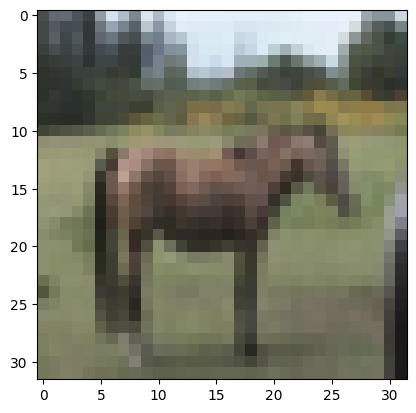

In [58]:
import numpy
import matplotlib.pyplot as plt
from PIL import Image

label_names = _load_label_names()

print('Imagen:')
sample_id=9999
sample_image=X_test[sample_id]
print(sample_image.shape)
sample_label=y_test[sample_id][0]
print('Etiqueta real - Etiqueta Id: {} Nombre: {}'.format(sample_label, label_names[sample_label]))  
#print(sample_image.shape)
sample_imageTrans = sample_image.reshape(1, 32, 32, 3)

print('Predicciones:')
resultados = model.predict(sample_imageTrans)[0]
print(resultados)
maxElement = numpy.amax(resultados)
print('certeza: ', str(round(maxElement*100, 4))+'%')
result = numpy.where(resultados == numpy.amax(resultados))
print('Max :', maxElement)
#print('Returned tuple of arrays :', result)
print('Lista de indices de máximo elemento :', result[0][0])
index_sample_label=result[0][0]

print(label_names)
print('Etiqueta predicción: ', label_names[index_sample_label])

img=sample_image
plt.imshow(img)

#Guardar imagen
#plt.savefig('Imagenes/imagen1.png')

#data = numpy.random.random((100,100))
#Rescale to 0-255 and convert to uint8
#rescaled = (255.0 / data.max() * (data - data.min())).astype(np.uint8)

im = Image.fromarray(sample_image)
im.save('imagen2.png')

<div style="color:#106ba3"><h3>2. Predicción de una imagen desde un Path</h3> </div>

Imagen:
(32, 32, 3)
Predicciones:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[0 0 0 0 0 0 0 1 0 0]
certeza:  100.0%
Max : 1.0
Lista de indices de máximo elemento : 7
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Etiqueta predicción:  horse


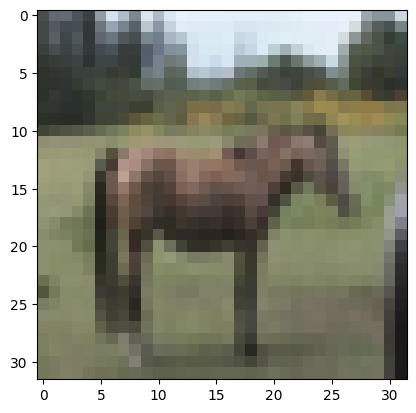

In [63]:
import numpy as np
from PIL import Image

print('Imagen:')
img = Image.open('imagen2.png').convert('RGB')
arr = np.array(img)
print(arr.shape)

arrTrans = arr.reshape(1, 32, 32, 3)

print('Predicciones:')
resultados = model.predict(arrTrans)[0]
print(resultados)
maxElement = numpy.amax(resultados)
print('certeza: ', str(round(maxElement*100, 4))+'%')
result = numpy.where(resultados == numpy.amax(resultados))
print('Max :', maxElement)
#print('Returned tuple of arrays :', result)
print('Lista de indices de máximo elemento :', result[0][0])
index_sample_label=result[0][0]

print(label_names)
print('Etiqueta predicción: ', label_names[index_sample_label])

sample_image = arrTrans.reshape(32, 32, 3)

img=sample_image
plt.imshow(img)

<div id="DesarrolloRedDensa" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Desarrollo de Red Neuronal Estándar (Densa)</h2> </div>

In [69]:
#Se puede partir del dataset anterior o cargar el dataset de keras:
#from tensorflow.keras.datasets import cifar10
#(X_train, y_train), (X_test, y_test) = cifar10.load_data()
#x_train = X_train/255
#x_test = X_test/255

#Para transformar X en estructura clásica de ML (2D) para aplicar técnicas como SVM, Redes Neuronales Densas, KNN, etc.
X_trainReshapeImageRow=x_train.reshape((x_train.shape[0],3072))
print(X_trainReshapeImageRow.shape)                 
X_testReshapeImageRow=x_test.reshape((x_test.shape[0],3072))
print(X_testReshapeImageRow.shape) 

(50000, 3072)
(10000, 3072)


In [73]:
%pip install opencv-python


   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   -- ------------------------------------- 2.6/39.5 MB 18.9 MB/s eta 0:00:02
   ----- ---------------------------------- 5.8/39.5 MB 16.8 MB/s eta 0:00:03
   ---------- ----------------------------- 10.7/39.5 MB 19.2 MB/s eta 0:00:02
   --------------- ------------------------ 15.5/39.5 MB 19.9 MB/s eta 0:00:02
   ------------------- -------------------- 19.7/39.5 MB 20.0 MB/s eta 0:00:01
   ------------------------ --------------- 24.4/39.5 MB 20.9 MB/s eta 0:00:01
   ------------------------------ --------- 29.6/39.5 MB 21.9 MB/s eta 0:00:01
   ----------------------------------- ---- 34.9/39.5 MB 22.2 MB/s eta 0:00:01
   ---------------------------------------  39.3/39.5 MB 22.5 MB/s eta 0:00:01
   ---------------------------------------- 39.5/39.5 MB 21.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Imagen 9999:
Imagen - Valor Min: 0.01568627450980392 Valor Max: 0.9882352941176471
Imagen - Shape: (3072,)
Etiqueta - Etiqueta Id: 5 Nombre: dog


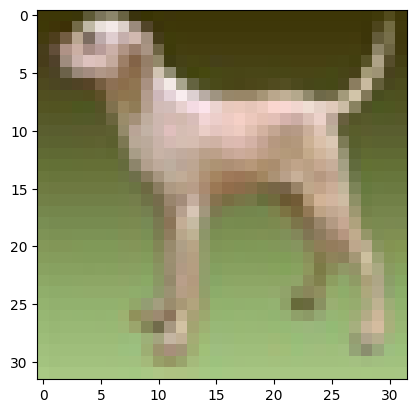

In [74]:
# Función para visualizar y describir una imagen específica
import cv2 as cv

def display_stats(sample_id):
    features, labels = X_trainReshapeImageRow, y_train
    sample_image = features[sample_id]
    sample_label = labels[sample_id][0]
    label_names = _load_label_names()
    print('\nImagen {}:'.format(sample_id))
    print('Imagen - Valor Min: {} Valor Max: {}'.format(sample_image.min(), sample_image.max()))
    print('Imagen - Shape: {}'.format(sample_image.shape))
    print('Etiqueta - Etiqueta Id: {} Nombre: {}'.format(sample_label, label_names[sample_label]))
    #plt.axis('off')
    imagen=sample_image.reshape(32, 32, 3)#.transpose(1, 2, 0)
    plt.imshow(imagen)
    cv.imwrite('imagen.jpg', imagen) # type: ignore
sample_id = 9999
display_stats(sample_id)

In [75]:
# Se desarrolla el modelo
modeloestandar = Sequential()
modeloestandar.add(Dense(32, input_dim=X_trainReshapeImageRow.shape[1], activation='relu'))
modeloestandar.add(Dense(32, activation='relu'))   
modeloestandar.add(Dense(64, activation='relu'))
modeloestandar.add(Dense(64, activation='relu'))
modeloestandar.add(Dense(64, activation='relu'))
modeloestandar.add(Dense(64, activation='relu'))
modeloestandar.add(Dense(512, activation='relu'))
modeloestandar.add(Dense(512, activation='relu'))
#en la última capa tiene que haber tantas neuronas como clases haya, en este caso 10
modeloestandar.add(Dense(10, activation='softmax'))

#compilamos el modelo
modeloestandar.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

size_batch = 512
epocas = 20
history = modeloestandar.fit(X_trainReshapeImageRow, y_train, batch_size= size_batch, epochs=epocas, verbose=1)

c:\Users\mlata\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1733 - loss: 2.1502
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3046 - loss: 1.8770
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3396 - loss: 1.7999
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3643 - loss: 1.7441
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3803 - loss: 1.6999
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3918 - loss: 1.6770
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3944 - loss: 1.6554
Epoch 8/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4048 - loss: 1.6356
Epoch 9/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4083 - loss: 1.6239
Epoch 10/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4208 - loss: 1.5832
Epoch 11/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4225 - loss: 1.5919
Epoch 12/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4285 - lo

In [76]:
resultadosRedEstandar=modeloestandar.evaluate(X_testReshapeImageRow, y_test)
error_rate_rnestandar=resultadosRedEstandar[0]
print('loss:',error_rate_rnestandar)
acc_rnestandar=resultadosRedEstandar[1]
print('acc:',acc_rnestandar)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4423 - loss: 1.5238
loss: 1.5371432304382324
acc: 0.445499986410141


<div id="Comparacion" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Comparación de CNN vs Red Neuronal Densa</h2> </div>

In [77]:
tabla = pd.DataFrame(columns=('Método', 'Accuracy','Loss'))
tabla.loc[len(tabla)]=['Red Neuronal Estándar',acc_rnestandar,error_rate_rnestandar] 
tabla.loc[len(tabla)]=['CNN',acc_cnn,error_rate_cnn] 
tabla.head()

,Método,Accuracy,Loss
0,Red Neuronal Estándar,0.4455,1.537143
1,CNN,0.6737,0.910149


<div id="Conclusiones" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Conclusiones</h2> </div>

En esta práctica has aprendido a realizar la exploración en un dataset de imágenes multiclase (10 categorías). El conjunto de datos es balanceado (misma cantidad de imágenes de cada categoría). Además, has construido y comparado dos modelos: una red neuronal convolucional y una red neuronal estándar. Los resultados demuestran que una CNN es superior a una red estándar para problemas de clasificación de imágenes.

<div id="Referencias" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Referencias</h2> </div>

[1] Bishop, C. M. (2006). Pattern recognition and machine learning. Springer.

[2] P. Joshi. (2017). Artificial intelligence with python. Packt Publishing Ltd.

**Enlaces de documentación de scikit-learn, tensorflow y keras:**

https://www.tensorflow.org/api_docs/python/tf/nn/conv2d

https://keras.io/examples/cifar10_cnn/